In [1]:
from extract import extract
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get data here
experiment_name = 'experiment_3'
rootpath = '/Users/nils/Downloads/results'
data = extract(rootpath)

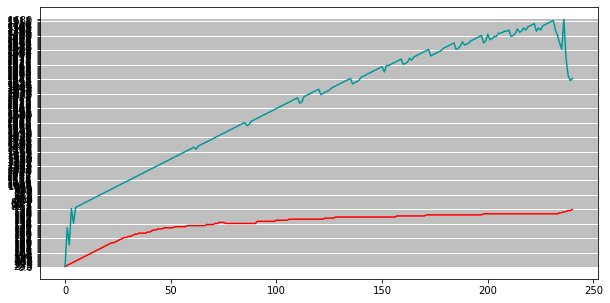

In [3]:
number_of_nodes = '1'
round = '3'

experiment = data[experiment_name]['node-count-' + number_of_nodes]['round-' + round]


cpu_master = experiment['cpu-master']
cpu_workers = experiment['cpu-worker']

len_master = len(cpu_master)
len_workers = list(map(len, cpu_workers))
min_number_of_values = min(len_master, min(len_workers)) - 1
# min_number_of_values = 150

X = np.arange(min_number_of_values)

# plot the data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

colors= ['b', 'g', 'y', 'c', 'm', '#ff6600', '#666633', '#009999'] 

# plot master
ax.plot(X, cpu_master[:min_number_of_values], color='r', label='master')

for i in range(0, len(cpu_workers)):
    cpu_worker = cpu_workers[i][:min_number_of_values]
    Y = np.array(cpu_worker)
    ax.plot(X, Y, color=colors[i-1], label='worker')

ax.yaxis.grid()
# plt.yticks([100, 200, 300, 400])

# display the plot
plt.show()
fig.savefig('cpu-usage.pdf')
